`News`: Twitter has been rebranded as `X`

### NLP Hands-on: Twitter US Airline Sentiment

#### `Sample data screenshot`

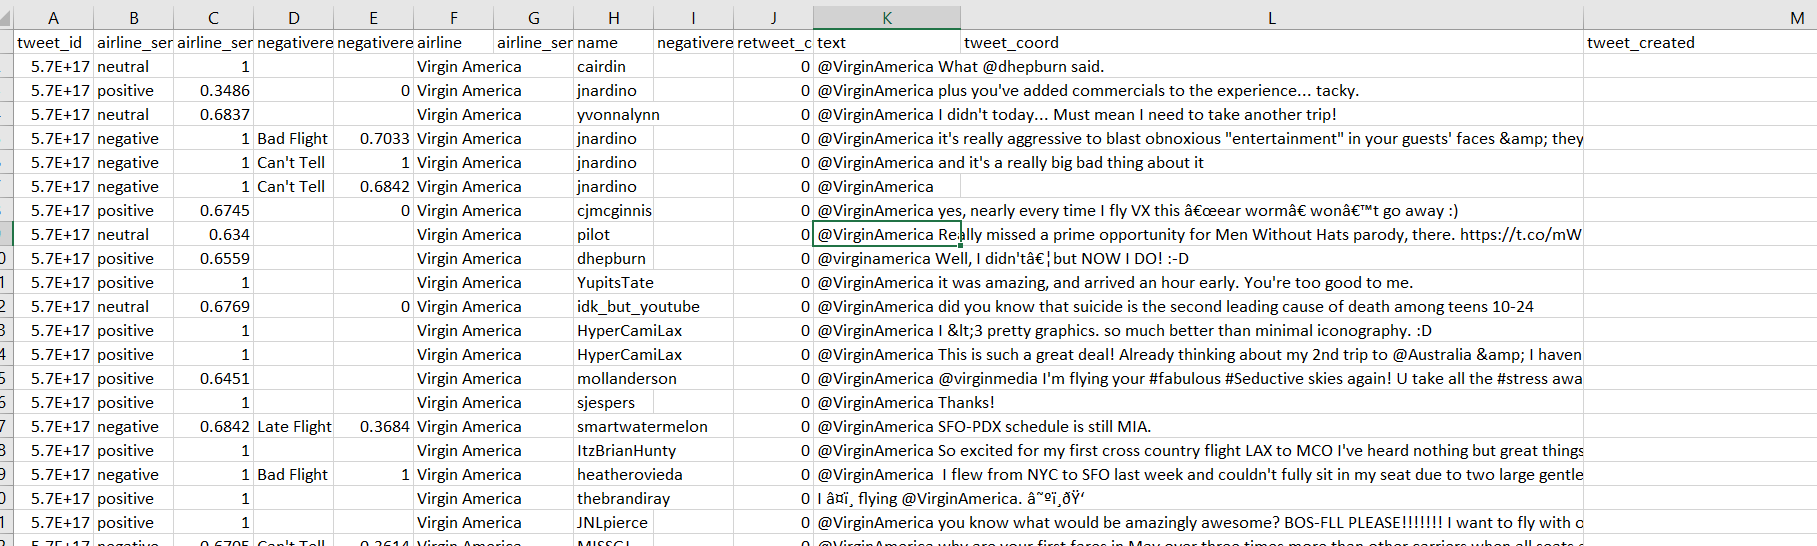

### Objective: To predict category for the `sentiment of tweets` into three categories: `positive`, `negative` and `neutral`

### Data Description:

- `Source`: `Twitter` -- coming from a project on Kaggle
    
    
- `Description:` -- Passengers tweets about airline performance, having sentiments about their journey`
    


# **Learning Outcomes**:
- Text based Exploratory Data Analysis
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Tune & Evaluate the Model performance.
- Plot the  important features after training the model.

In [96]:
!pip install contractions

In [97]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 - `contractions`: Used to expand contractions in text (e.g., `"can't" --> "cannot"`)
 
 - `re`, `string`, `unicodedata`: For regular expressions (`regex`), string operations, and handling Unicode data
 
 - `Beautifulsoup` : A library for parsing `HTML`content, which may be used to clean up the tweet text
 
 - `NLTK`: A comprehensive library for working with humna language data (text). Here, it is used for downloading `stopwords`, `tokenizing words & sentences`, and `lemmatizing` (reducing words to their base form!

### Load the data into `Pandas DataFrame`

In [174]:
data = pd.read_csv("Tweets.csv")

In [175]:
data.sample(3).T

,2230,12334,11855
tweet_id,569305546819571712,570226471941251072,567727581873848320
airline_sentiment,neutral,neutral,negative
airline_sentiment_confidence,1.0,0.6857,1.0
negativereason,NaN,NaN,Cancelled Flight
negativereason_confidence,NaN,NaN,1.0
airline,United,American,US Airways
airline_sentiment_gold,NaN,NaN,NaN
name,c4pyro,beantownmatty,laura_crom
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


#### Identify the missing values

In [100]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Let us do some `amazing EDA`

#### `Percentage of tweets` for each airline

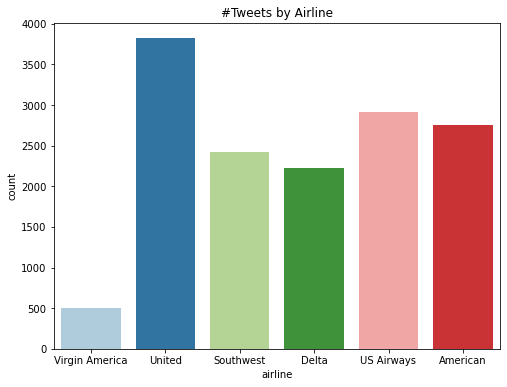

In [101]:
plt.subplots(figsize=(8,6))

sns.countplot(
data = data,
x='airline',
palette = 'Paired')


plt.title("#Tweets by Airline")
plt.show()

In [102]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [103]:
data['airline'].nunique()

6

In [104]:
print("Total number of Tweets:", data['text'].count())

Total number of Tweets: 14640


#### `Task #1 for 15 Dec 2024`

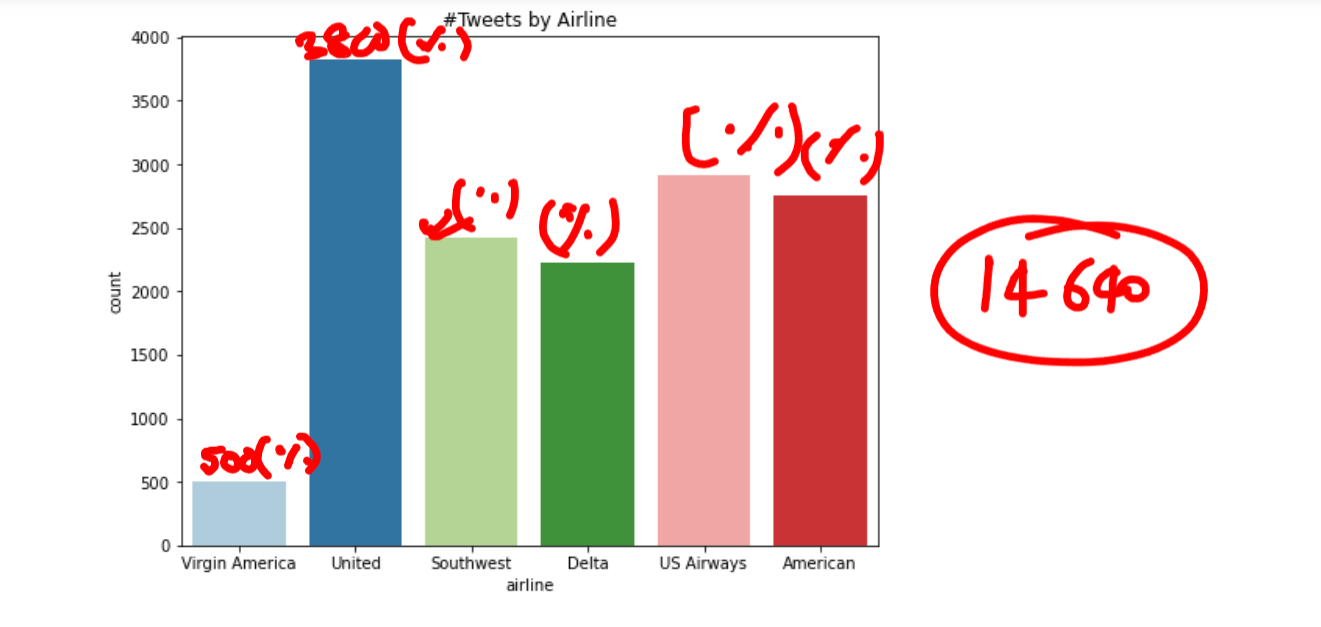

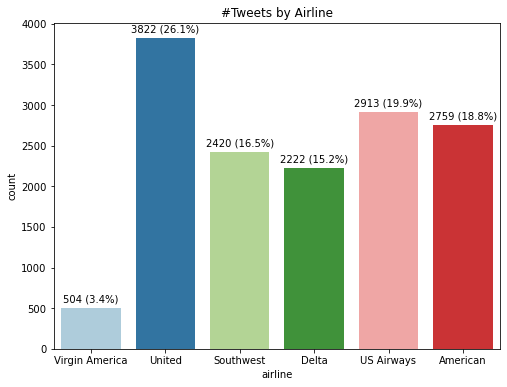

In [105]:
# Get Total tweets
totalDatas = data['airline'].count()

plt.subplots(figsize=(8,6))
ax = sns.countplot(data = data, x='airline', palette = 'Paired')
# Add annotations
for p in ax.patches:
    eachCount = format(p.get_height(), '.0f')
    percentage = format ((p.get_height() / totalDatas) * 100, '.1f')
    text = eachCount + ' (' + percentage + '%)'
    ax.annotate(text, (p.get_x() + (p.get_width()/2), p.get_height()), ha='center',xytext=(0, 6), textcoords='offset points')

plt.title("#Tweets by Airline")
plt.show()

In [106]:
tweet_summ = data.groupby('airline').agg(
 count_tweets = ('text', 'count')).reset_index()

In [107]:
tweet_summ

,airline,count_tweets
0,American,2759
1,Delta,2222
2,Southwest,2420
3,US Airways,2913
4,United,3822
5,Virgin America,504


In [108]:
tweet_summ['Total Tweets'] = tweet_summ['count_tweets'].sum()

In [109]:
tweet_summ

,airline,count_tweets,Total Tweets
0,American,2759,14640
1,Delta,2222,14640
2,Southwest,2420,14640
3,US Airways,2913,14640
4,United,3822,14640
5,Virgin America,504,14640


In [110]:
tweet_summ['% Tweets'] = tweet_summ['count_tweets']/tweet_summ['Total Tweets']

In [111]:
tweet_summ

,airline,count_tweets,Total Tweets,% Tweets
0,American,2759,14640,0.188456
1,Delta,2222,14640,0.151776
2,Southwest,2420,14640,0.165301
3,US Airways,2913,14640,0.198975
4,United,3822,14640,0.261066
5,Virgin America,504,14640,0.034426


- As we can see the %age  of tweets for `United` airline has the highest (**26.1%**), followed by `US Airways` (**~20%**)

- However its the total tweets by airline not by `sentiment category`

### `Distribution of Sentiments` across all the tweets for all the airlines

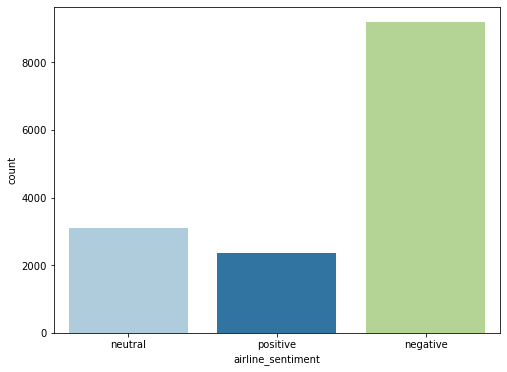

In [112]:
plt.subplots(figsize=(8,6))

sns.countplot(
data = data,
x='airline_sentiment',
palette = 'Paired')

plt.show()

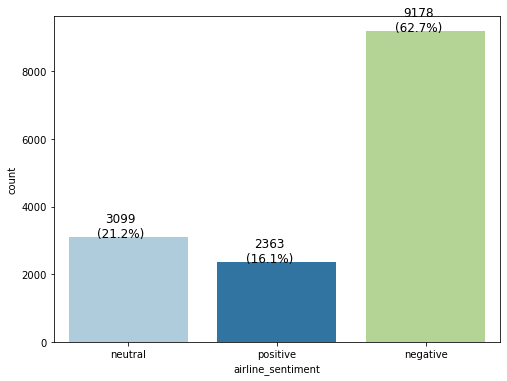

In [113]:


# Assuming 'data' is your DataFrame and 'airline_sentiment' is your column of interest
plt.subplots(figsize=(8, 6))

# Plot the countplot
ax = sns.countplot(
    data=data,
    x='airline_sentiment',
    palette='Paired'
)

# Calculate total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot

plt.show()


- **Majority of the tweets are negative `(63%)`, followed by neutral tweets (21%), and then the positive tweets (16%)**

- Its common for people to get on `Twitter (now X)` and rant about bad **customer service**

### `Distribution of Sentiments' categories by Airline` across all the tweets

Text(0.5, 1.0, "Distribution of Sentiments' categories by Airline")

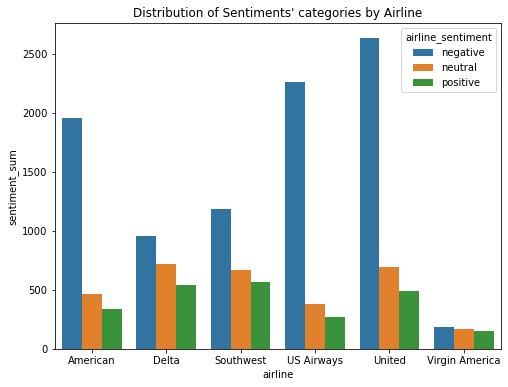

In [114]:
sentiment__by_airline=data.groupby(['airline','airline_sentiment']).agg(
 sentiment_sum=('airline_sentiment','count')
).reset_index()
plt.subplots(figsize=(8,6))
sns.barplot(data=sentiment__by_airline,
            x='airline',
            y='sentiment_sum',
            hue='airline_sentiment')
plt.title("Distribution of Sentiments' categories by Airline")

- **Majority of the negative tweets(63%) are coming for `United` & `US Airways`**

- `Virgin America` airline is probably the only airline where the ratio of **three sentiment categories is somewhat similar** however they are the smallest airline company

- `Delta` & `Southwest` airlines have relatively **less negative tweets** in proportion compared to others

### Can be refined further as shown below: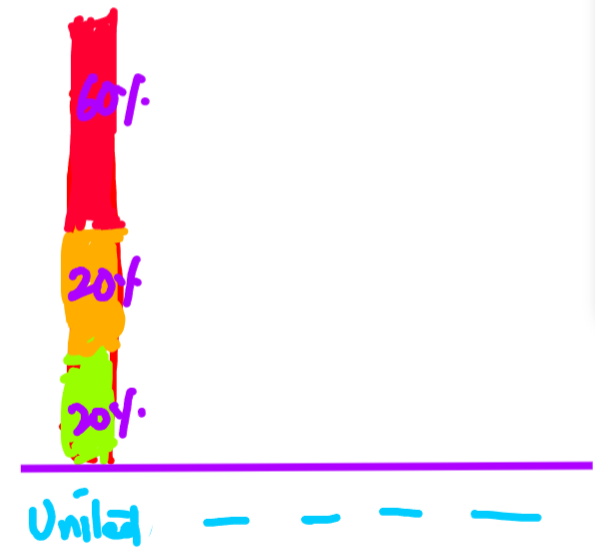

In [115]:
data['text'].tolist()

['@VirginAmerica What @dhepburn said.',
 "@VirginAmerica plus you've added commercials to the experience... tacky.",
 "@VirginAmerica I didn't today... Must mean I need to take another trip!",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
 '@VirginAmerica I &lt;3 pretty graphic

### Let us focus on `negative tweets` and plot all negative reasons

In [116]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

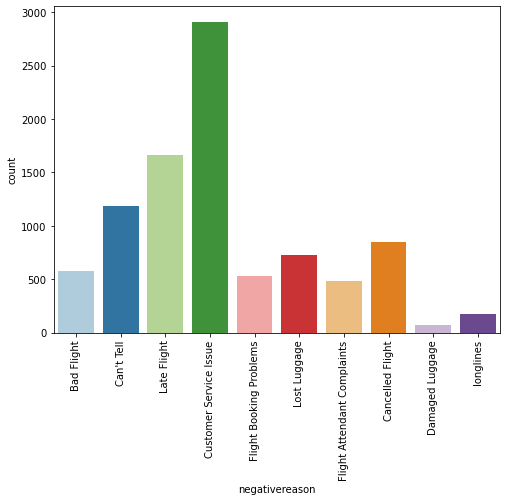

In [117]:
plt.subplots(figsize = (8,6))

sns.countplot(data = data, x='negativereason', palette = 'Paired')

### rotate the x tickmarks by 90 degrees
plt.xticks(rotation = 90)
plt.show()


In [118]:
filter_neg_reason = data['negativereason'] == 'Customer Service Issue'
data[filter_neg_reason]['text'].tolist() # filter all the tweets having negative reason == Customer Service Issue

['@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
 "@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.",
 '@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!',
 '@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(',
 '@VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk',
 "@VirginAmerica I called a 3-4 weeks ago about adding 3 flights from 2014 to my Elevate...they still haven't shown up...help!",
 '@VirginAmerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me please? :/',
 '@VirginAmerica what is going on with customer service? Is there anyway to speak to a human asap? Thank you.',
 "@VirginAmerica why can't you supp the biz traveler like @So

In [119]:
filter_neg_reason = data['negativereason'] == "Can't Tell"
data[filter_neg_reason]['text'].tolist() # filter all the tweets having negative reason == Customer Service Issue

["@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???',
 "@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail",
 '@VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next four flights I planned.#neverflyvirginforbusiness',
 '@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin',
 '@VirginAmerica Why is the site down?  When will it be back up?',
 '@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable',
 '@VirginAmerica @FiDiFamilies us to

- `Customer service` is the top reason for negative sentiments

### Task - Plot the different negative reasons for each airline

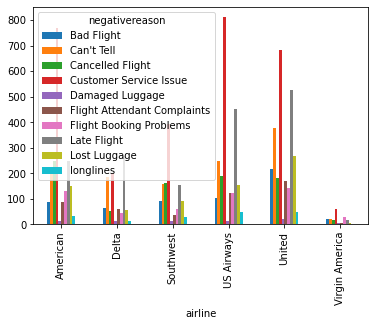

## Word cloud for each class of `sentiment category`

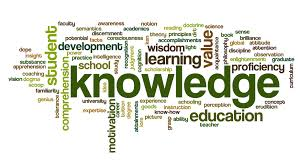

- A word cloud is a `visual representation` of text data where each word indicates its frequency or importance within a given text or set of texts

- High frequency --> bigger font size of word in the word cloud

### Let us start with `word cloud` for `negative tweets`

In [120]:
from wordcloud import WordCloud, STOPWORDS

In [121]:
neg_df = data[data['airline_sentiment']=='negative'] #filtered for all the negative sentiment tweets

In [122]:
neg_df.shape

(9178, 15)

In [123]:
words = ' '.join(neg_df['text']) #combines all the passengers tweets (text column) into a single string, where each tweet is separated by space

In [124]:
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

### Cleaning the combined string

In [125]:
sample_words = " RT @Indigo Check out this link which talks about your so called policies and request you to follow them too"

In [126]:
split_words = sample_words.split()

In [127]:
split_words

['RT',
 '@Indigo',
 'Check',
 'out',
 'this',
 'link',
 'which',
 'talks',
 'about',
 'your',
 'so',
 'called',
 'policies',
 'and',
 'request',
 'you',
 'to',
 'follow',
 'them',
 'too']

In [128]:
type(split_words)

list

In [129]:
cleaned_text = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word #filter out any word that contains 'http'
                        and not word.startswith('@') # or start with @ and
                        and word !='RT' # retweets
                        ])

In [130]:
cleaned_text

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [131]:
wordcloud = WordCloud(stopwords = STOPWORDS, #exclude common stopwords
                     background_color='black',
                     width = 3000,
                     height = 2500,
                     colormap = 'rainbow',
                     ).generate(cleaned_text)

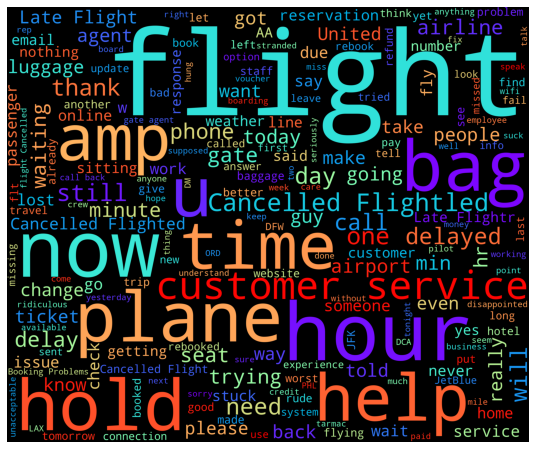

In [132]:
plt.subplots(figsize = (12,8))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Similarly, `word cloud` for `positive tweets`

In [133]:
pos_df = data[data['airline_sentiment']=='positive'] #filter out for positive tweets
words = ' '.join(pos_df['text']) #combines all the tweets (text column) into a single string, where each positive tweet is separated by space

In [134]:
cleaned_text = " ".join([word for word in words.split() #split the text into words
                        if 'http' not in word #filter out any word that contains 'http'
                        and not word.startswith('@') # or start with @ and
                        and word !='RT' # retweets
                        ])

In [135]:
cleaned_text

'plus you\'ve added commercials to the experience... tacky. yes, nearly every time I fly VX this “ear worm” won’t go away :) Well, I didn\'t…but NOW I DO! :-D it was amazing, and arrived an hour early. You\'re too good to me. I &lt;3 pretty graphics. so much better than minimal iconography. :D This is such a great deal! Already thinking about my 2nd trip to &amp; I haven\'t even gone on my 1st trip yet! ;p I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel Thanks! So excited for my first cross country flight LAX to MCO I\'ve heard nothing but great things about Virgin America. #29DaysToGo I ❤️ flying ☺️👍 you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you. I love this graphic. I love the hipster innovation. You are a feel good brand. this is great news! America could start flights to Hawaii by end of year via Moodlighting is the only way to fly! Best experience EVER! Cool and calming. 💜✈ #MoodlitMonday Done

In [136]:
wordcloud = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='black',
                      width=3000,
                      height=2500,
                      colormap = 'rainbow'
                     ).generate(cleaned_text)


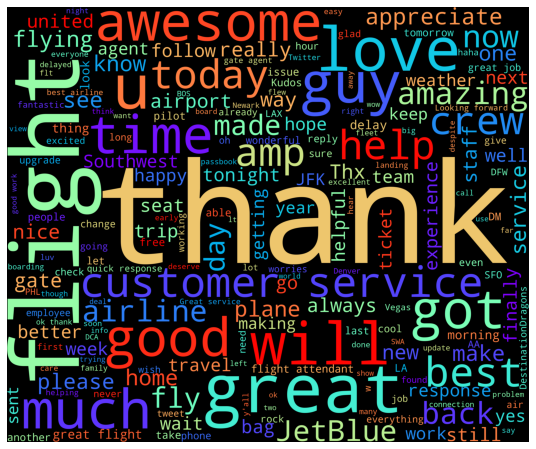

In [137]:
plt.subplots(figsize = (12,8))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [138]:
import os
os.getcwd()


'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\03. AI and DL IITR-01Sep2024'

## Data Pre-processing

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

In [176]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

### Remove `html` tags

In [177]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [178]:
data['text'] = data['text'].apply(lambda x:strip_html(x)) #lambda function takes the entry and passes to strip_html function to remove html tags

In [179]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [180]:
data1= pd.DataFrame({
    'text': [
        '<p>This is a <strong>sample</strong> text with <a href="https://example.com">HTML</a> tags.</p>',
        '<p>It includes various tags such as <em>emphasis</em>, <strong>bold</strong>, and <a href="https://anotherexample.com">links</a>.</p>',
        '<div><ul><li>Item 1</li><li>Item 2</li><li>Item 3</li></ul></div>',
        '<p>Thank you for visiting!</p>'
    ]
})

In [181]:
data1

,text
0,<p>This is a <strong>sample</strong> text with...
1,<p>It includes various tags such as <em>emphas...
2,<div><ul><li>Item 1</li><li>Item 2</li><li>Ite...
3,<p>Thank you for visiting!</p>


In [182]:
data1['text'] = data1['text'].apply(lambda x: strip_html(x))

In [183]:
data1

,text
0,This is a sample text with HTML tags.
1,"It includes various tags such as emphasis, bol..."
2,Item 1Item 2Item 3
3,Thank you for visiting!


### Replace contractions in string (e.g., replace `I'm --> I am`, `We'll --> We will`) and so on

In [184]:
def replace_contractions(text):
    '''
    Replace contractions in string of text
    
    '''
    return contractions.fix(text)
    

In [185]:
data['text'] = data['text'].apply(lambda x:replace_contractions(x)) #lambda function takes the entry and passes to replace_contractions function to fix contractions

In [186]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14640, dtype: object

### Remove numbers

In [187]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

- `re.sub(pattern, replacement, string)`: This function replaces `occurrences of a pattern` in the given string with a `replacement string`.

- `''`: empty string

In [188]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

In [189]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, Length: 14640, dtype: object

### Tokenization 

- Tokenization is the process of splitting text into `individual units` such as words or tokens, which can be useful for various NLP tasks

In [190]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt') #download tokenizer models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [191]:
data['text'][5]

'@VirginAmerica seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA'

   #### `Tokenization Examples`

In [194]:
# Example sentences
sentence1 = "Helloworld! This is an example sentence."
sentence2 = "I'm learning Natural Language Processing (NLP)."
sentence3 = "Do you know how to tokenize text properly?"
sentence4 = "Python is amazing! Let's explore NLP."

In [195]:
### Toekinizing the sentences
tokens1 = word_tokenize(sentence1)
tokens2 = word_tokenize(sentence2)
tokens3 = word_tokenize(sentence3)
tokens4 = word_tokenize(sentence4)

In [196]:
print('Tokens for sentence1:', tokens1)
print('Tokens for sentence2:', tokens2)
print('Tokens for sentence3:', tokens3)
print('Tokens for sentence4:', tokens4)

Tokens for sentence1: ['Helloworld', '!', 'This', 'is', 'an', 'example', 'sentence', '.']
Tokens for sentence2: ['I', "'m", 'learning', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', '.']
Tokens for sentence3: ['Do', 'you', 'know', 'how', 'to', 'tokenize', 'text', 'properly', '?']
Tokens for sentence4: ['Python', 'is', 'amazing', '!', 'Let', "'s", 'explore', 'NLP', '.']


In [197]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of tweets

In [198]:
data['text'].tail(10)

14630               [@, AmericanAir, Thanks, !, He, is, .]
14631    [@, AmericanAir, thanks, for, nothing, on, get...
14632    [“, @, AmericanAir, :, @, TilleyMonsta, George...
14633    [@, AmericanAir, my, flight, was, Cancelled, F...
14634    [@, AmericanAir, right, on, cue, with, the, de...
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Name: text, dtype: object

- Use **`spaCy`**: Provides more advanced `tokenization & additional` NLP features

### To remove `Stopwords`

In [200]:
stopwords = stopwords.words('english')

In [202]:
len(stopwords)

179

In [203]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [206]:
retained_stopwords =['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [207]:
stopwords = list(set(stopwords) - set(retained_stopwords))

In [208]:
stopwords

['to',
 'after',
 'd',
 'very',
 "that'll",
 'ours',
 'these',
 'so',
 'on',
 'most',
 'i',
 'just',
 'what',
 'until',
 'while',
 'were',
 'yourselves',
 'own',
 'for',
 'is',
 "you're",
 'by',
 'if',
 'or',
 'up',
 'then',
 'some',
 "should've",
 "you'd",
 'was',
 'ourselves',
 'against',
 'y',
 'she',
 'have',
 'yourself',
 't',
 "aren't",
 'me',
 'he',
 'this',
 'itself',
 'only',
 'further',
 'nor',
 'himself',
 'those',
 'before',
 'of',
 's',
 'the',
 'my',
 'an',
 'am',
 'too',
 'll',
 'who',
 'how',
 'don',
 'but',
 'yours',
 'they',
 'and',
 'o',
 'above',
 'be',
 'them',
 're',
 'm',
 'as',
 'ain',
 'hers',
 'we',
 'will',
 'out',
 'both',
 'that',
 'her',
 'aren',
 'down',
 'myself',
 'herself',
 'through',
 'other',
 'it',
 'again',
 'did',
 'him',
 'from',
 'whom',
 'where',
 'over',
 'once',
 'when',
 'here',
 'are',
 'why',
 'during',
 'does',
 'because',
 'more',
 've',
 'few',
 'no',
 'can',
 'should',
 'now',
 'with',
 'under',
 'their',
 'all',
 'each',
 'below',
 '

### Lemmatization 

### `Lemmatization Examples`

In [209]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [216]:
nltk.download('wordnet') #download wordnet
nltk.download('omw-1.4') #download wordnet data for lemmatization
nltk.download('punkt') #download tokenizer for demonstration
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [212]:
lemmatizer = WordNetLemmatizer()

### Examples of words for lemmatization
words = ['running', 'flies', 'studies', 'better', 'feet', 'geese', 'children']

In [213]:
words

['running', 'flies', 'studies', 'better', 'feet', 'geese', 'children']

In [215]:
#### lemmatize without specifying parts of speech (POS)
print("Without Parts of Speech tagging (default:Noun):")

for word in words:
    print(f"{word} --> {lemmatizer.lemmatize(word)}")

Without Parts of Speech tagging (default:Noun):
running --> running
flies --> fly
studies --> study
better --> better
feet --> foot
geese --> goose
children --> child


- Default lemmatization in `NLTK` assumes that words are nouns and if no parts of speech (POS) is specified, then it can lead to incorrect results for certain words

In [217]:
lemmatizer = WordNetLemmatizer()

### Function to convert POS tags to Wordnet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'): #Adjective
        return wordnet.ADJ
    elif treebank_tag.startswith('V'): #verb
        return wordnet.VERB
    elif treebank_tag.startswith('N'): #noun
        return wordnet.NOUN
    elif treebank_tag.startswith('R'): #adverb
        return wordnet.ADV
    else:
        return None

In [218]:
words

['running', 'flies', 'studies', 'better', 'feet', 'geese', 'children']

In [222]:
### POS tagging
pos_tags = nltk.pos_tag(words)

In [223]:
pos_tags

[('running', 'VBG'),
 ('flies', 'NNS'),
 ('studies', 'NNS'),
 ('better', 'RBR'),
 ('feet', 'NNS'),
 ('geese', 'JJ'),
 ('children', 'NNS')]

In [225]:
### Lemmatize with correct POS
print("Lemmatized with POS:")
for word, pos in pos_tags:
    wordnet_pos = get_wordnet_pos(pos) or wordnet.NOUN #Default POS is noun if no POS is found
    lemmatized = lemmatizer.lemmatize(word, pos = wordnet_pos)
    print(f"{word} ({pos}), --> {lemmatized}")
    


Lemmatized with POS:
running (VBG), --> run
flies (NNS), --> fly
studies (NNS), --> study
better (RBR), --> well
feet (NNS), --> foot
geese (JJ), --> geese
children (NNS), --> child


In [226]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn say,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus add commercials experience ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica not today must mean need take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Build the model based on `countvectorizer` and `Random Forest`

- Vectorization: COnverts text data into numbers

In [228]:
from sklearn.feature_extraction.text import CountVectorizer #to convert a collection of text docs into a matrix of token counts

#### Simple example text to demonstrate the `text to number conversion`

In [230]:
# Example text data
texts = [
    "I love machine learning",
    "Machine learning is fun",
    "I enjoy learning"
]

In [231]:
print(texts)

['I love machine learning', 'Machine learning is fun', 'I enjoy learning']


In [232]:
### Initialize CountVectorizer
count_vec = CountVectorizer(max_features=100)
## Fit and transform the text data
data_features = count_vec.fit_transform(texts)
print(data_features)

### Convert to array
data_features_array = data_features.toarray()

  (0, 4)	1
  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	1
  (1, 2)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1


In [233]:
### Output the results
print('Vocabulary:', count_vec.get_feature_names_out())
print("Data Features Array: \n", data_features_array)

Vocabulary: ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']
Data Features Array: 
 [[0 0 0 1 1 1]
 [0 1 1 1 0 1]
 [1 0 0 1 0 0]]


In [234]:
Count_vec = CountVectorizer(max_features=5000) #keeping only 5000 features as more number of features will increase the processing time 
data_features_2 = Count_vec.fit_transform(data['text'])

data_features_2_array = data_features_2.toarray()

`max_features`: signifies the unique number of features (i.e., unique words or tokens) --> 5000
    
- Keekping the limit to 5000, it ensures that only top 5000 most frequent words are kept in the model


In [235]:
data_features_2_array.shape

(14640, 5000)

In [236]:
X = data_features_2 #training features
y = data.airline_sentiment #training target

In [237]:
X

<14640x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 134810 stored elements in Compressed Sparse Row format>

### Split data into training and testing set

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Using `Random Forest` to build the model for the classification of tweets

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nlp_rf = RandomForestClassifier(n_estimators=10, n_jobs=4)

'''
n_estimators=10 --> specifies the number of trees in the forest
n_jobs=4 --> means that up to 4 CPU cores will be used to parallelize the computation, which speeds up the training process
'''

### Training the model
nlp_rf = nlp_rf.fit(X_train, y_train)

In [244]:
print(nlp_rf)

RandomForestClassifier(n_estimators=10, n_jobs=4)


In [245]:
print(np.mean(cross_val_score(nlp_rf, X, y, cv=5)))

0.6995901639344263


### Generate accuracy on the `test set`

In [247]:
print(nlp_rf.score(X_test, y_test))

0.7563752276867031


### `MODEL SECOND ITERATION`

In [248]:
Count_vec = CountVectorizer(max_features=10000) #keeping only 5000 features as more number of features will increase the processing time 
data_features_2 = Count_vec.fit_transform(data['text'])

data_features_2_array = data_features_2.toarray()

`max_features`: signifies the unique number of features (i.e., unique words or tokens) --> 5000
    
- Keekping the limit to 5000, it ensures that only top 5000 most frequent words are kept in the model


In [249]:
data_features_2_array.shape

(14640, 10000)

In [250]:
X = data_features_2 #training features
y = data.airline_sentiment #training target

In [251]:
X

<14640x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 139810 stored elements in Compressed Sparse Row format>

### Split data into training and testing set

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Using `Random Forest` to build the model for the classification of tweets

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nlp_rf = RandomForestClassifier(n_estimators=50, n_jobs=6)

'''
n_estimators=10 --> specifies the number of trees in the forest
n_jobs=4 --> means that up to 4 CPU cores will be used to parallelize the computation, which speeds up the training process
'''

### Training the model
nlp_rf = nlp_rf.fit(X_train, y_train)

In [255]:
print(nlp_rf)

RandomForestClassifier(n_estimators=50, n_jobs=6)


In [256]:
print(np.mean(cross_val_score(nlp_rf, X, y, cv=5)))

0.7104508196721311


### Generate accuracy on the `test set`

In [257]:
print(nlp_rf.score(X_test, y_test))

0.782103825136612


#### With simple and small tweaks, accuracy for `test set` increased by **3%**